In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
#IFR.drop(index='AFRICA', level=1, inplace=True)
#IFR.loc['Germany']
#IFR.xs("Germany", level="Country")

#idx = pd.IndexSlice
#IFR.loc[pd.IndexSlice[:, 'Paper'], :]
#IFR.loc[idx[:, :, 2003], :]
#IFR.loc[pd.IndexSlice['AFRICA', :, :]]

#IFR.xs((1993, 'Germany', 'Agriculture'), level=("Year", "Country", 'Industry'))

Formalia
- skriv intro
- Github mappe
- Format

Lav grafer

Orden formalia 

Merge datasæt?

# Read and clean data

I use data that i use for machines from a project i'm writing. The data has three layers of idexes: year, country and industry. Dealing with this tripple-index has been very difficult,  and i have spent an insane amount of time trying to get everything to work. As of now, i can't get the merge and the visualization right.

In [3]:
dat = pd.read_excel('Data_project_data.xlsx', sheet_name='Data', index_col=[0,4,2])

## Cleaning the data

I start by removing the columns 'industry' and 'country', since they contain the same information as 'Industry' and 'Country', respectively.

In [4]:
# dropping two columns
dat.drop(['country', 'industry', 'Installations'], axis=1, inplace=True)

The data includes a list of observations that are not countries. These are aggregated nubers, like Europe or South East Asia, and i would like the dataset to only consist of countries. 

I have made a sheet in the excel sheet with a column of the indexes that are not countries, and i loop over this and remove from the data set. 

Importing the sheet as a dataframe and converting it to a list is not the most elegant solution.

In [5]:
# 1. loading the sheet as a dataframe
nc = pd.read_excel('Data_project_data.xlsx', sheet_name='Not countries', header=None)

# 2. converting the dataframe to a list
NC = nc.values.tolist()

# 3. droping all non-countries from the dataframe
for x in NC:
    dat.drop(index=x, level=1, inplace=True)

The data set contains many variables the authors don't use. I have made sheet in the excel containing the unused indexes.

In [6]:
# 1. reading the data as a dataframe
nu = pd.read_excel('Data_project_data.xlsx', sheet_name='Not used', header=None)

# 2. converting the dataframe to a list
NU = nu.values.tolist()

# 3. looping over each index and removing it from the data in each year and country. 
for x in NU:
    dat.drop(index=x, level=2, inplace=True)

I change the name of the column, "Operational stock", to remove the white space. 

In [7]:
# 1. creating a dictionary of coulmn names
columns_dict = {}
columns_dict['Operational stock'] = 'Stock'

# 2. renaming the column
dat.rename(columns=columns_dict, inplace=True)

I'm replicating a paper, where the authors use different names for industries. I wan't to be able to merge my data with the authors, and therefore i change the indexes for industries. 

In [8]:
# 1. creating dictionary of indexes
ind_dict = {}
ind_dict['Agriculture, forestry, fishing'] = 'Agriculture'
ind_dict['Mining and quarrying'] = 'Mining'
ind_dict['Education/research/development'] = 'Education and Research'
ind_dict['Electricity, gas, water supply'] = 'Utilities'
ind_dict['All other non-manufacturing branches'] = 'Services'
ind_dict['Plastic and chemical products'] = 'Plastics and Chemicals'
ind_dict['Metal products (non-automotive)'] = 'Metal Products'
ind_dict['Industrial machinery'] = 'Industrial Machinery'
ind_dict['Food and beverages'] = 'Food and Beverages'
ind_dict['Basic metals'] = 'Basic Metals'
ind_dict['Electrical/electronics'] = 'Electronics'
ind_dict['All other manufacturing branches'] = 'Miscellaneous Manufacturing'
ind_dict['Glass, ceramics, stone, mineral products (non-auto'] = 'Minerals'
ind_dict['Wood and furniture'] = 'Wood and Furniture'
ind_dict['Other vehicles'] = 'Shipbuilding and Aerospace'
ind_dict['Paper'] = 'Paper and Printing'

# 2. changing the indexes
dat.rename(index=ind_dict, inplace=True)

Lastly, i would like to remove a list of variables. 

In [9]:
dat.drop(index=['Unspecified', 'Metal, unspecified', 'All Industries', 'Services', 'Paper and Printing', 'Wood and Furniture', 'Shipbuilding and Aerospace'], level=2, inplace=True)

### Employment data

I import an excel spreadsheet with employment data for each of the five countries. I set the columns to the right names and create one set.

In [11]:
# i create a list of the countries that i want to include
countries = ['DK', 'FI', 'FR', 'IT', 'SE']

# i make an empty dataframe
EMP = pd.DataFrame()

# creating a dictionary of coulmn names
columns_dict_emp = {}
columns_dict_emp['year'] = 'Year'
columns_dict_emp['geo_name'] = 'Country'
columns_dict_emp['nace_r2_name'] = 'Industry'

In [12]:
# i loop over each excel sheet and extract the data i need.
for i in countries:
    i = pd.read_excel(i + '_national accounts.xlsx', sheet_name='EMP')
    
    i.rename(columns=columns_dict_emp, inplace=True)
    
    i.drop(['var', 'geo_code', 'nace_r2_code'], axis=1, inplace=True)
    
    EMP = EMP.append(i)

I rename the variables in order to merge the data.

In [13]:
ind_dict_emp = {}
ind_dict_emp['Agriculture, forestry and fishing'] = 'Agriculture'
ind_dict_emp['Mining and quarrying'] = 'Mining'
ind_dict_emp['Education'] = 'Education and Research'
ind_dict_emp['Electricity, gas, steam and air conditioning supply'] = 'Utilities'
ind_dict_emp['Manufacture of chemicals and chemical products'] = 'Plastics and Chemicals'
ind_dict_emp['Manufacture of basic metals and fabricated metal products, except machinery and equipment'] = 'Metal Products'
ind_dict_emp['Manufacture of machinery and equipment n.e.c.'] = 'Industrial Machinery'
ind_dict_emp['Manufacture of food products; beverages and tobacco products'] = 'Food and Beverages'
ind_dict_emp['Manufacture of basic metals and fabricated metal'] = 'Basic Metals'
ind_dict_emp['Manufacture of computer, electronic and optical products'] = 'Electronics'
ind_dict_emp['Manufacture of rubber and plastic products and other non-metallic mineral products'] = 'Minerals'
ind_dict_emp['Manufacture of textiles, wearing apparel, leather and related products'] = 'Textiles'
ind_dict_emp['Manufacture of motor vehicles, trailers, semi-trailers and of other transport equipment'] = 'Automotive'
ind_dict_emp['Construction'] = 'Construction'

# changing the indexes
EMP.rename(index=ind_dict_emp, inplace=True)

I need to make the employment data into a long dataset in order to merge it. 

In [14]:
year = [1995 + i for i in range(26)]
column_dict_emp = {}

for i in year: 
    column_dict_emp[str(i)]= f'empl{i}'
    
EMP.rename(columns=column_dict_emp, inplace=True)

In [15]:
emp_long = pd.wide_to_long(EMP, stubnames='empl', i=['Country', 'Industry'], j='Year')

## Merge

Now i merge the data sets. This is not succesfull. For some reason, the function can only extract one industry.

In [65]:
# i extract the five countries from my original data. 

DAT = pd.DataFrame()
COUNTRIES = ['Denmark', 'Finland', 'France', 'Italy', 'Sweden']
for i in COUNTRIES:
    
    x = dat.xs((str(i)), level=("Country"), drop_level=False)
    
    DAT = DAT.append(x)

In [59]:
merged = DAT.merge(emp_long, left_index=True, right_on=['Year', 'Country', 'Industry'])

In [61]:
merged.sample(20)

Stock    empl
Country Industry     Year               
Denmark Construction 2000      0   180.0
Sweden  Construction 2004     46   232.0
France  Construction 2002      0  1562.0
Italy   Construction 2016    215  1550.2
Sweden  Construction 2009     13   291.0
Finland Construction 2004      3   164.5
                     2003      3   160.0
France  Construction 2014    183  1816.0
Italy   Construction 2006     23  1885.7
Finland Construction 1997      1   140.3
                     2011     21   193.1
France  Construction 2000      0  1485.0
Finland Construction 2013     22   190.0
Denmark Construction 2002      0   178.0
Italy   Construction 2003      9  1707.8
France  Construction 2012    123  1838.0
                     2004      0  1598.0
Italy   Construction 2002      3  1647.8
Finland Construction 2000      3   158.7
                     2010     19   188.1

### Visualization

The visualization is not really possible for two reasons: first, the merge did not work. Secondly, i can't get the plot to work with three layers of idexes.

<AxesSubplot:xlabel='Industry,Year'>

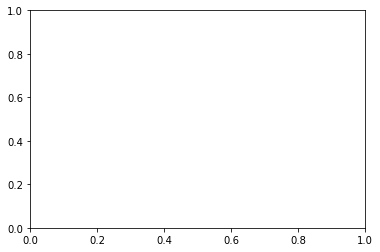

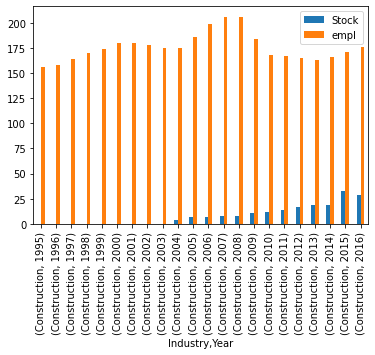

In [64]:
fig, ax = plt.subplots()
merged.xs('Denmark').plot(kind='bar')